In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('data\AQI.csv')

In [4]:
df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [5]:
df.sample()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
469,48,1,48,0,35,44.0414,16.1986


In [6]:
df.shape

(16695, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AQI_Value              16695 non-null  int64  
 1   CO_AQI_Value           16695 non-null  int64  
 2   Ozone_AQI_Value        16695 non-null  int64  
 3   NO2_AQI_Value          16695 non-null  int64  
 4   PM2.5_AQI_Value        16695 non-null  int64  
 5   latitude               16695 non-null  float64
 6   Liquefied_Natural_Gas  16695 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 913.1 KB


In [8]:

df.isna().sum()

AQI_Value                0
CO_AQI_Value             0
Ozone_AQI_Value          0
NO2_AQI_Value            0
PM2.5_AQI_Value          0
latitude                 0
Liquefied_Natural_Gas    0
dtype: int64

In [9]:
df.isna().sum() * 100 / len(df)

AQI_Value                0.0
CO_AQI_Value             0.0
Ozone_AQI_Value          0.0
NO2_AQI_Value            0.0
PM2.5_AQI_Value          0.0
latitude                 0.0
Liquefied_Natural_Gas    0.0
dtype: float64

Checking the number of unique values of each column

In [10]:
df.nunique()

AQI_Value                  282
CO_AQI_Value                31
Ozone_AQI_Value            203
NO2_AQI_Value               56
PM2.5_AQI_Value            298
latitude                 14135
Liquefied_Natural_Gas    14896
dtype: int64

Check statistics of data set

In [11]:

df.describe()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
count,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000,16695.000000
mean,62.998682,1.342138,31.767355,3.819647,59.821324,30.267148,-3.944485
std,43.091971,2.371379,22.839343,5.880677,43.208298,22.947398,73.037148
min,7.000000,0.000000,0.000000,0.000000,0.000000,-54.801900,-171.750000
25%,38.500000,1.000000,20.000000,0.000000,34.000000,16.515450,-75.180000
50%,52.000000,1.000000,29.000000,2.000000,52.000000,38.815800,5.643100
75%,69.000000,1.000000,38.000000,5.000000,69.000000,46.683300,36.275000
max,500.000000,133.000000,222.000000,91.000000,500.000000,70.767000,178.017800


Exploring Data

In [12]:

df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))

We have 7 numerical features : ['AQI_Value', 'CO_AQI_Value', 'Ozone_AQI_Value', 'NO2_AQI_Value', 'PM2.5_AQI_Value', 'latitude', 'Liquefied_Natural_Gas']


In [14]:

df.head(2)

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900


In [15]:

CO_AQI_Value= df[df['CO_AQI_Value'] == 100].count()
Ozone_AQI_Value = df[df['Ozone_AQI_Value'] == 100].count()
PM_AQI_Valu = df[df['PM2.5_AQI_Value'] == 100].count()

print(f'Number of AQI with CO AQI Value: {CO_AQI_Value}')
print(f'Number of AQI with Ozone AQI Value: {Ozone_AQI_Value}')
print(f'Number of AQI with PM2.5 AQI Valu: {PM_AQI_Valu}')

Number of AQI with CO AQI Value: AQI_Value                0
CO_AQI_Value             0
Ozone_AQI_Value          0
NO2_AQI_Value            0
PM2.5_AQI_Value          0
latitude                 0
Liquefied_Natural_Gas    0
dtype: int64
Number of AQI with Ozone AQI Value: AQI_Value                5
CO_AQI_Value             5
Ozone_AQI_Value          5
NO2_AQI_Value            5
PM2.5_AQI_Value          5
latitude                 5
Liquefied_Natural_Gas    5
dtype: int64
Number of AQI with PM2.5 AQI Valu: AQI_Value                31
CO_AQI_Value             31
Ozone_AQI_Value          31
NO2_AQI_Value            31
PM2.5_AQI_Value          31
latitude                 31
Liquefied_Natural_Gas    31
dtype: int64


Histogram & KDE

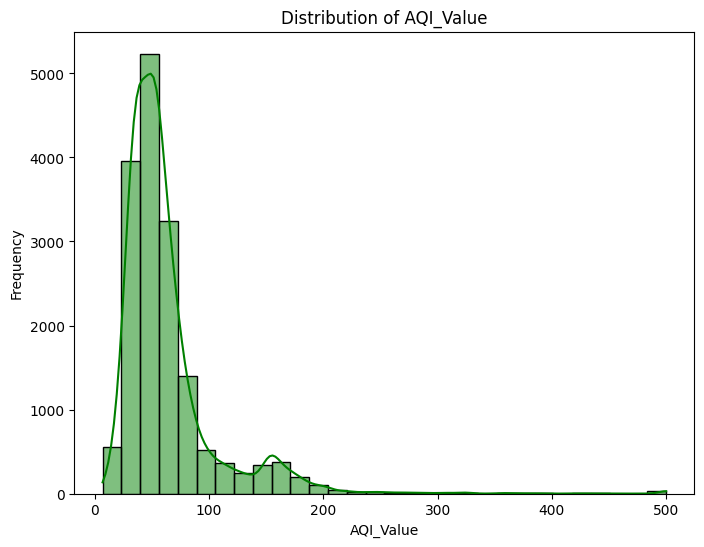

In [16]:
# Create a single subplot
plt.figure(figsize=(8, 6))  # Optional: Adjust figure size
sns.histplot(data=df, x='AQI_Value', bins=30, kde=True, color='g')
plt.title('Distribution of AQI_Value')  # Add a title
plt.xlabel('AQI_Value')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.show()

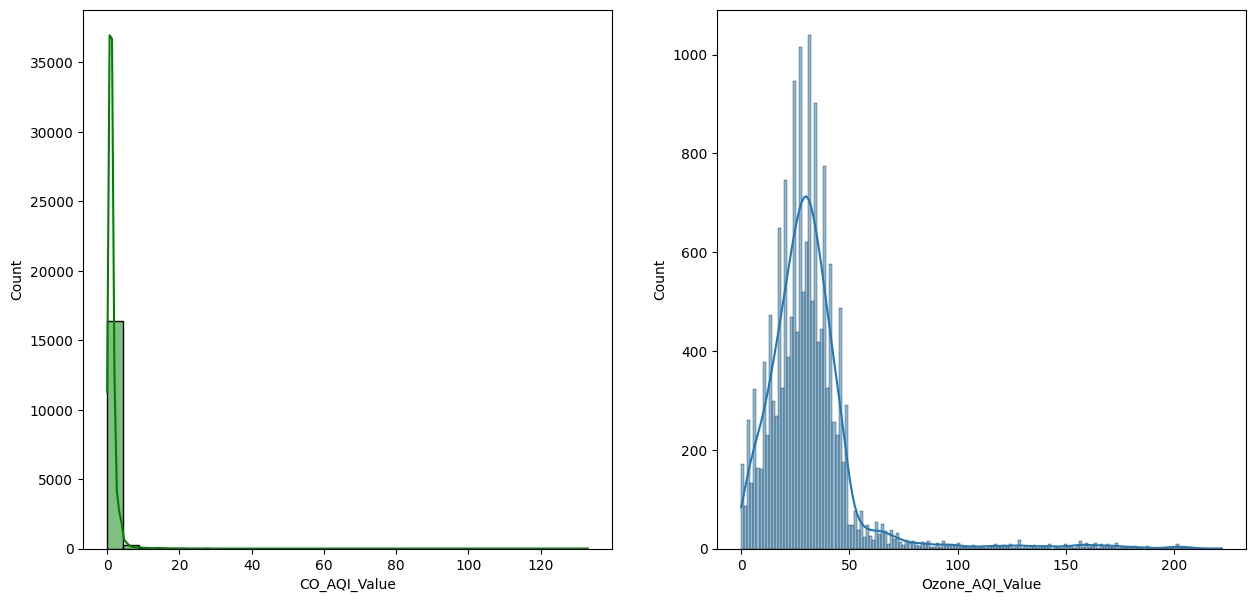

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='CO_AQI_Value',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Ozone_AQI_Value',kde=True)
plt.show()

In [18]:
df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


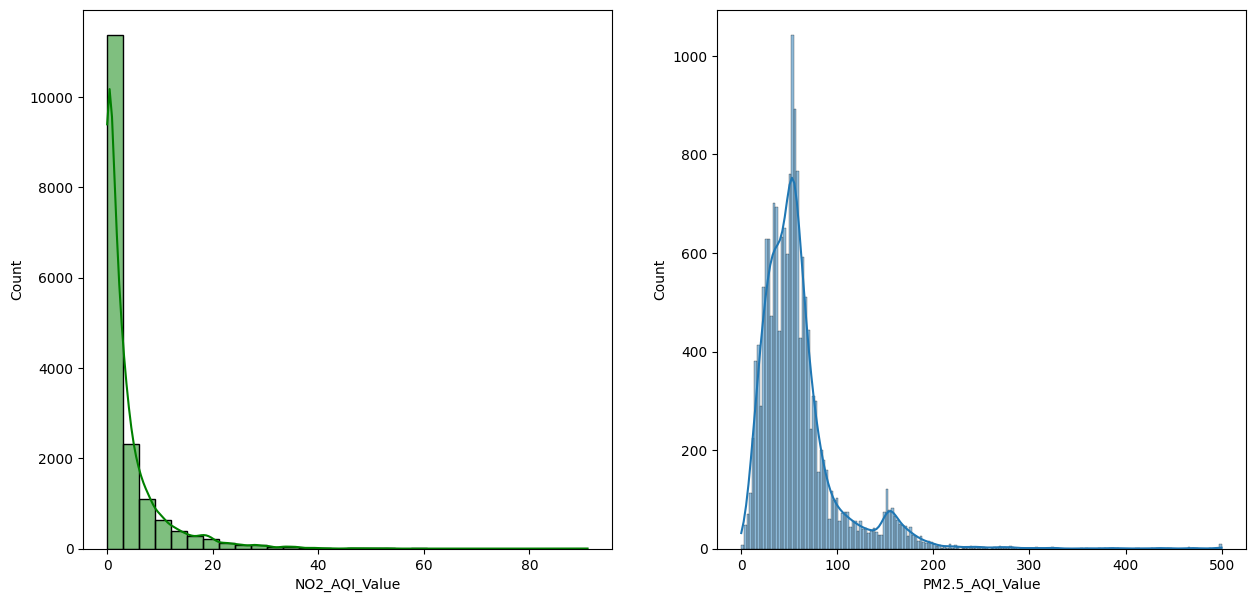

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='NO2_AQI_Value',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='PM2.5_AQI_Value',kde=True)
plt.show()

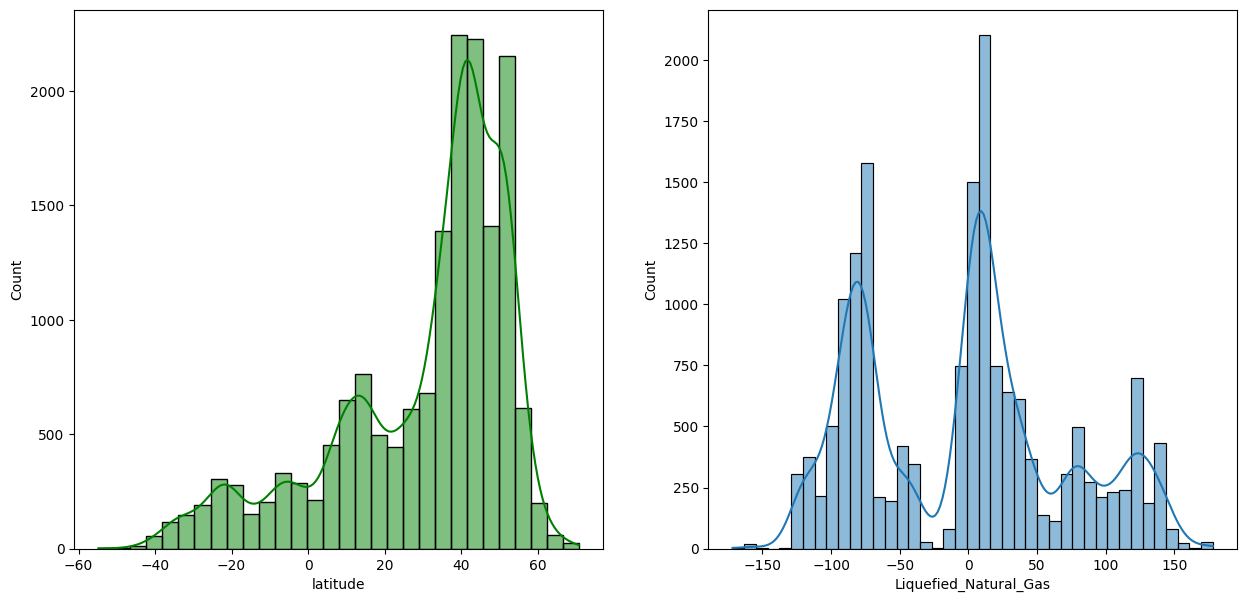

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='latitude',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Liquefied_Natural_Gas',kde=True)
plt.show()

In [21]:
# # Identify skewed columns
# skewed_columns = df[numeric_features].apply(lambda x: x.skew()).sort_values(ascending=False)
# skewness = pd.DataFrame({'Skew': skewed_columns})
# print(skewness)

# # Apply log transformation to skewed columns
# for col in skewness.index:
#     if skewness.loc[col, 'Skew'] > 0.5:
#         df[col] = np.log1p(df[col])

# # Check the skewness after transformation
# skewed_columns_transformed = df[numeric_features].apply(lambda x: x.skew()).sort_values(ascending=False)
# skewness_transformed = pd.DataFrame({'Skew': skewed_columns_transformed})
# print(skewness_transformed)

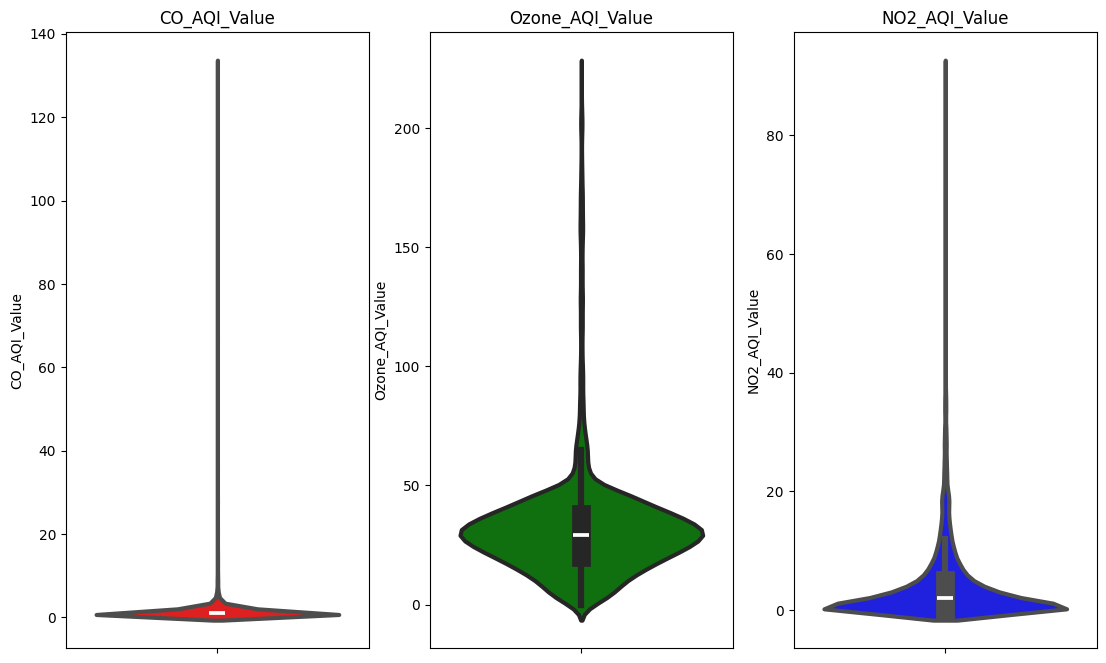

In [21]:
# Creating a figure with three subplots to visualize the distribution of scores (Math, Reading, and Writing) using violin plots.

# Setting up the figure size to (18, 8) for better visualization.
plt.figure(figsize=(18, 8))

# First subplot (on the left):
# Plotting a violin plot for the 'math_score' column, using the color red and setting the line width to 3.
plt.subplot(1, 4, 1)
plt.title('CO_AQI_Value')  # Adding a title for the math scores plot.
sns.violinplot(y='CO_AQI_Value', data=df, color='red', linewidth=3)

# Second subplot (in the middle):
# Plotting a violin plot for the 'reading_score' column, using the color green and setting the line width to 3.
plt.subplot(1, 4, 2)
plt.title('Ozone_AQI_Value')  # Adding a title for the reading scores plot.
sns.violinplot(y='Ozone_AQI_Value', data=df, color='green', linewidth=3)

# Third subplot (on the right):
# Plotting a violin plot for the 'writing_score' column, using the color blue and setting the line width to 3.
plt.subplot(1, 4, 3)
plt.title('NO2_AQI_Value')  # Adding a title for the writing scores plot.
sns.violinplot(y='NO2_AQI_Value', data=df, color='blue', linewidth=3)

# Displaying the plots.
plt.show()

In [22]:
df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


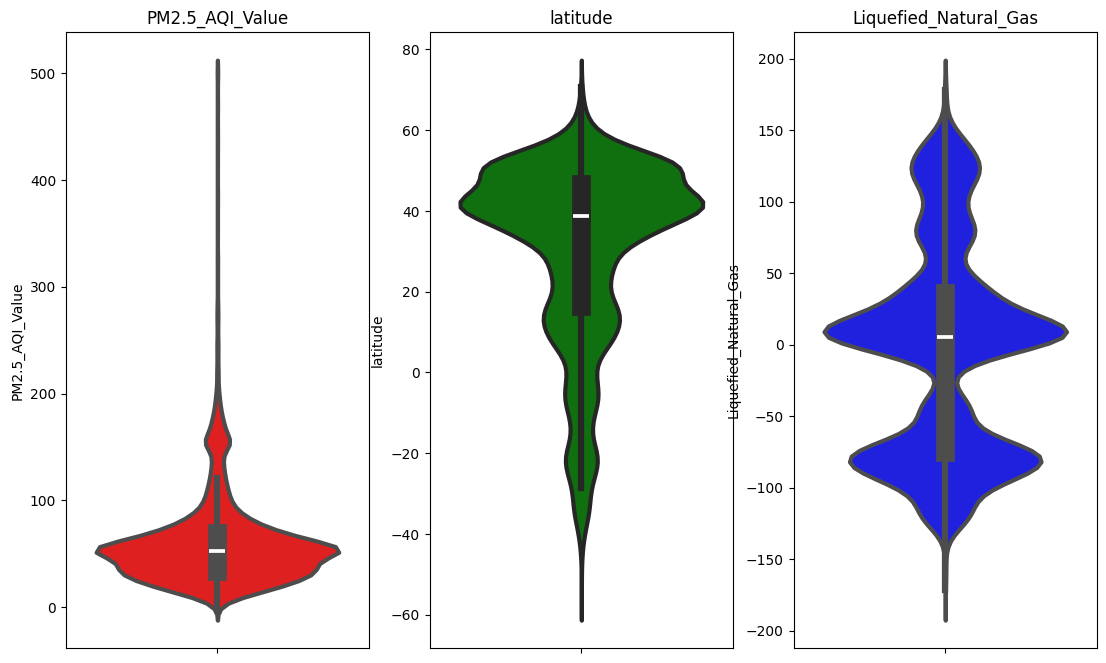

In [23]:
# Setting up the figure size to (18, 8) for better visualization.
plt.figure(figsize=(18, 8))

# First subplot (on the left):
# Plotting a violin plot for the 'math_score' column, using the color red and setting the line width to 3.
plt.subplot(1, 4, 1)
plt.title('PM2.5_AQI_Value')  # Adding a title for the math scores plot.
sns.violinplot(y='PM2.5_AQI_Value', data=df, color='red', linewidth=3)

# Second subplot (in the middle):
# Plotting a violin plot for the 'reading_score' column, using the color green and setting the line width to 3.
plt.subplot(1, 4, 2)
plt.title('latitude')  # Adding a title for the reading scores plot.
sns.violinplot(y='latitude', data=df, color='green', linewidth=3)

# Third subplot (on the right):
# Plotting a violin plot for the 'writing_score' column, using the color blue and setting the line width to 3.
plt.subplot(1, 4, 3)
plt.title('Liquefied_Natural_Gas')  # Adding a title for the writing scores plot.
sns.violinplot(y='Liquefied_Natural_Gas', data=df, color='blue', linewidth=3)

# Displaying the plots.
plt.show()

In [24]:
df.head()

,AQI_Value,CO_AQI_Value,Ozone_AQI_Value,NO2_AQI_Value,PM2.5_AQI_Value,latitude,Liquefied_Natural_Gas
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


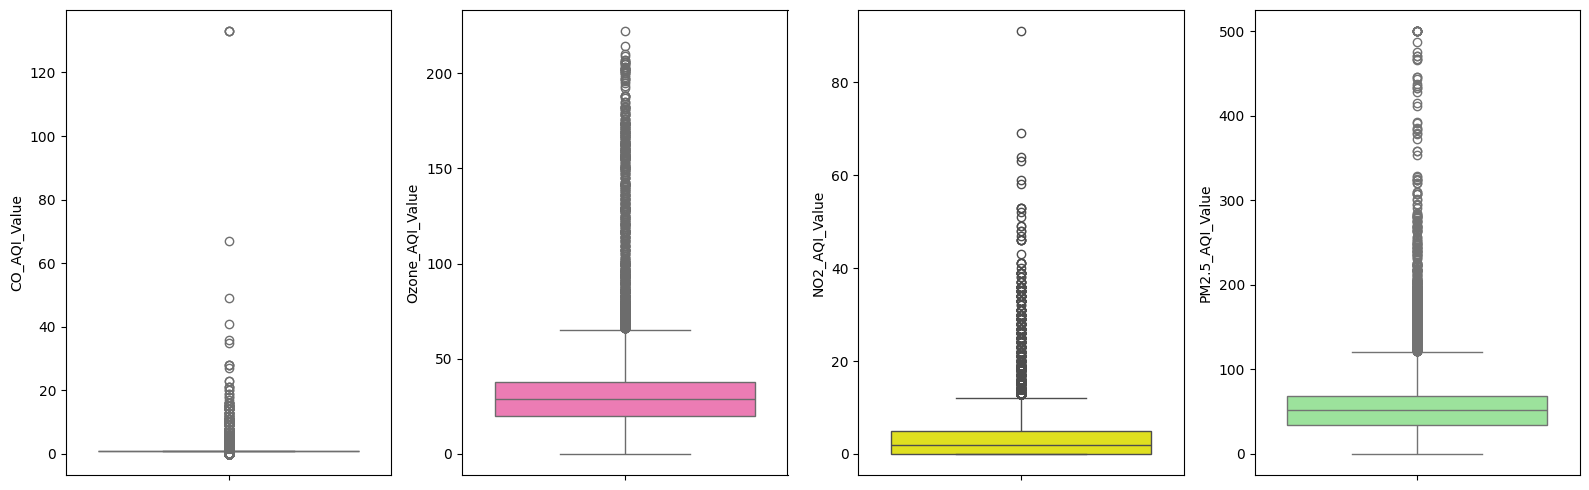

In [25]:
# Create a figure with 1 row and 4 columns of subplots, with a figure size of 16x5
plt.subplots(1, 4, figsize=(16, 5))

# Create the first subplot (1 row, 4 columns, position 1)
plt.subplot(141)

# Plot a boxplot for the 'CO_AQI_Value' column with a skyblue color
sns.boxplot(df['CO_AQI_Value'], color='skyblue')

# Create the second subplot (1 row, 4 columns, position 2)
plt.subplot(142)

# Plot a boxplot for the 'Ozone_AQI_Value' column with a hotpink color
sns.boxplot(df['Ozone_AQI_Value'], color='hotpink')

# Create the third subplot (1 row, 4 columns, position 3)
plt.subplot(143)

# Plot a boxplot for the 'NO2_AQI_Value' column with a yellow color
sns.boxplot(df['NO2_AQI_Value'], color='yellow')

# Create the fourth subplot (1 row, 4 columns, position 4)
plt.subplot(144)

# Plot a boxplot for the 'PM2.5_AQI_Value' score column with a lightgreen color
sns.boxplot(df['PM2.5_AQI_Value'], color='lightgreen')

# Display the plots
plt.tight_layout()  # Adjust the spacing between subplots to avoid overlap
plt.show()

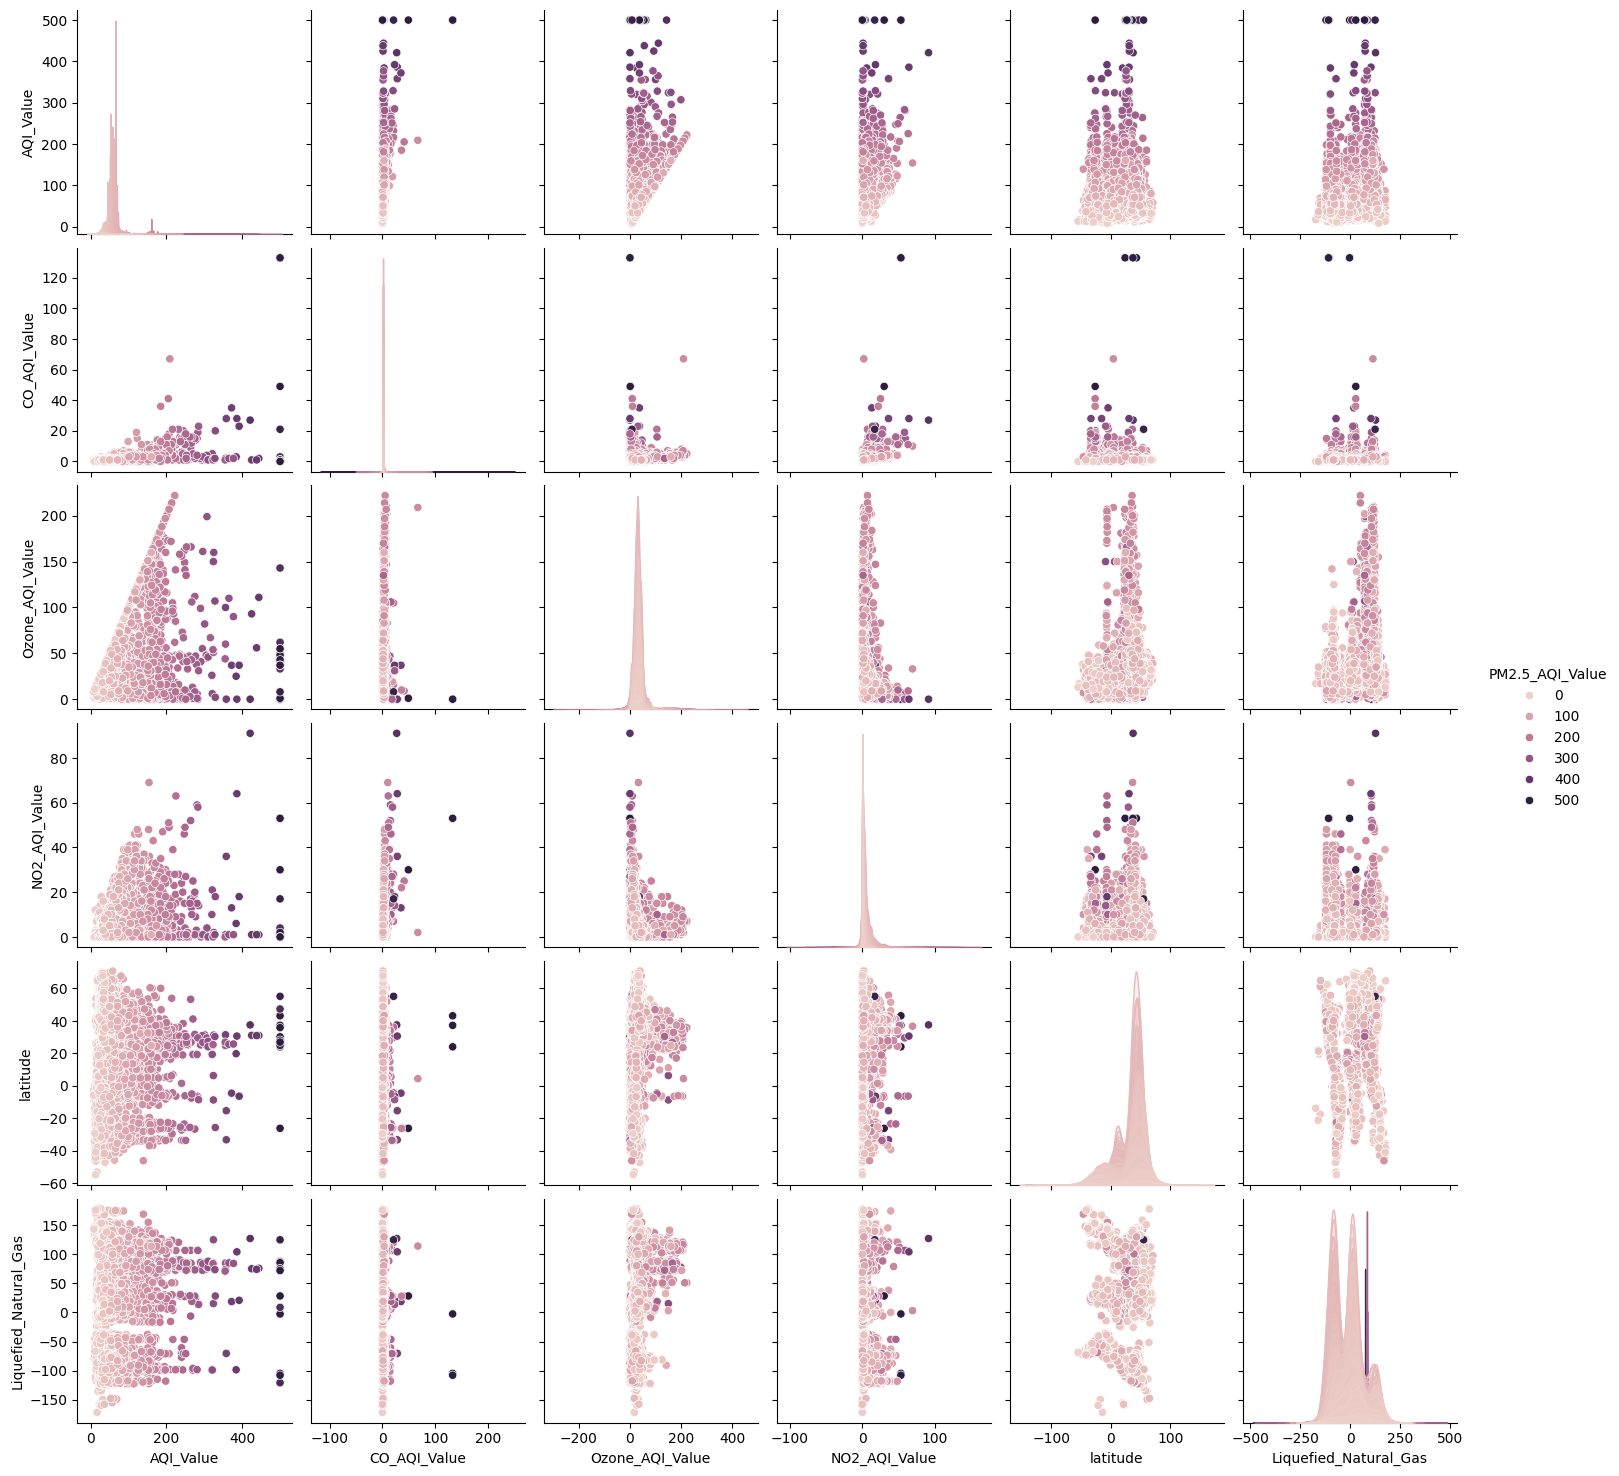

In [26]:
sns.pairplot(df,hue = 'PM2.5_AQI_Value')
plt.show()

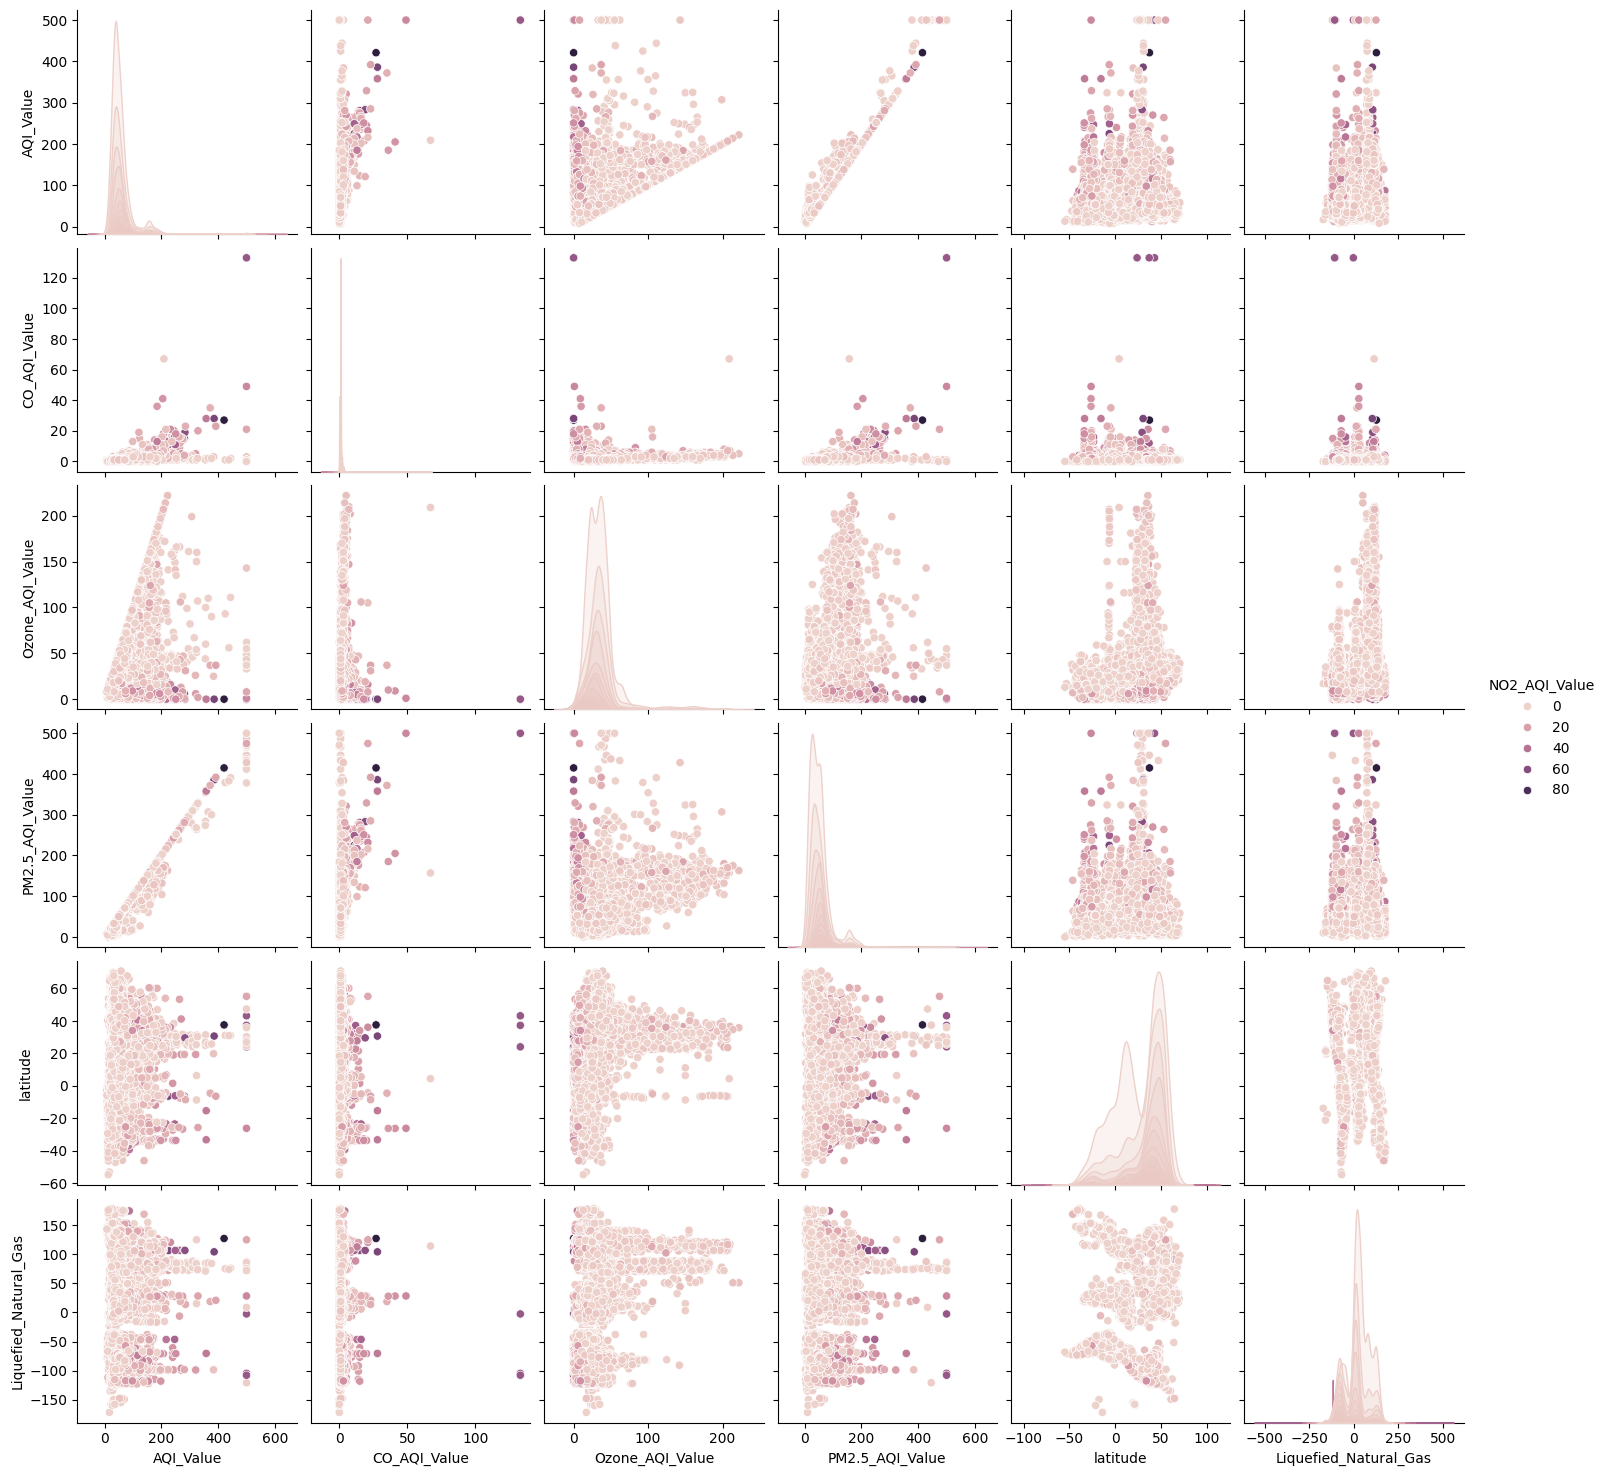

In [27]:
sns.pairplot(df,hue = 'NO2_AQI_Value')
plt.show()

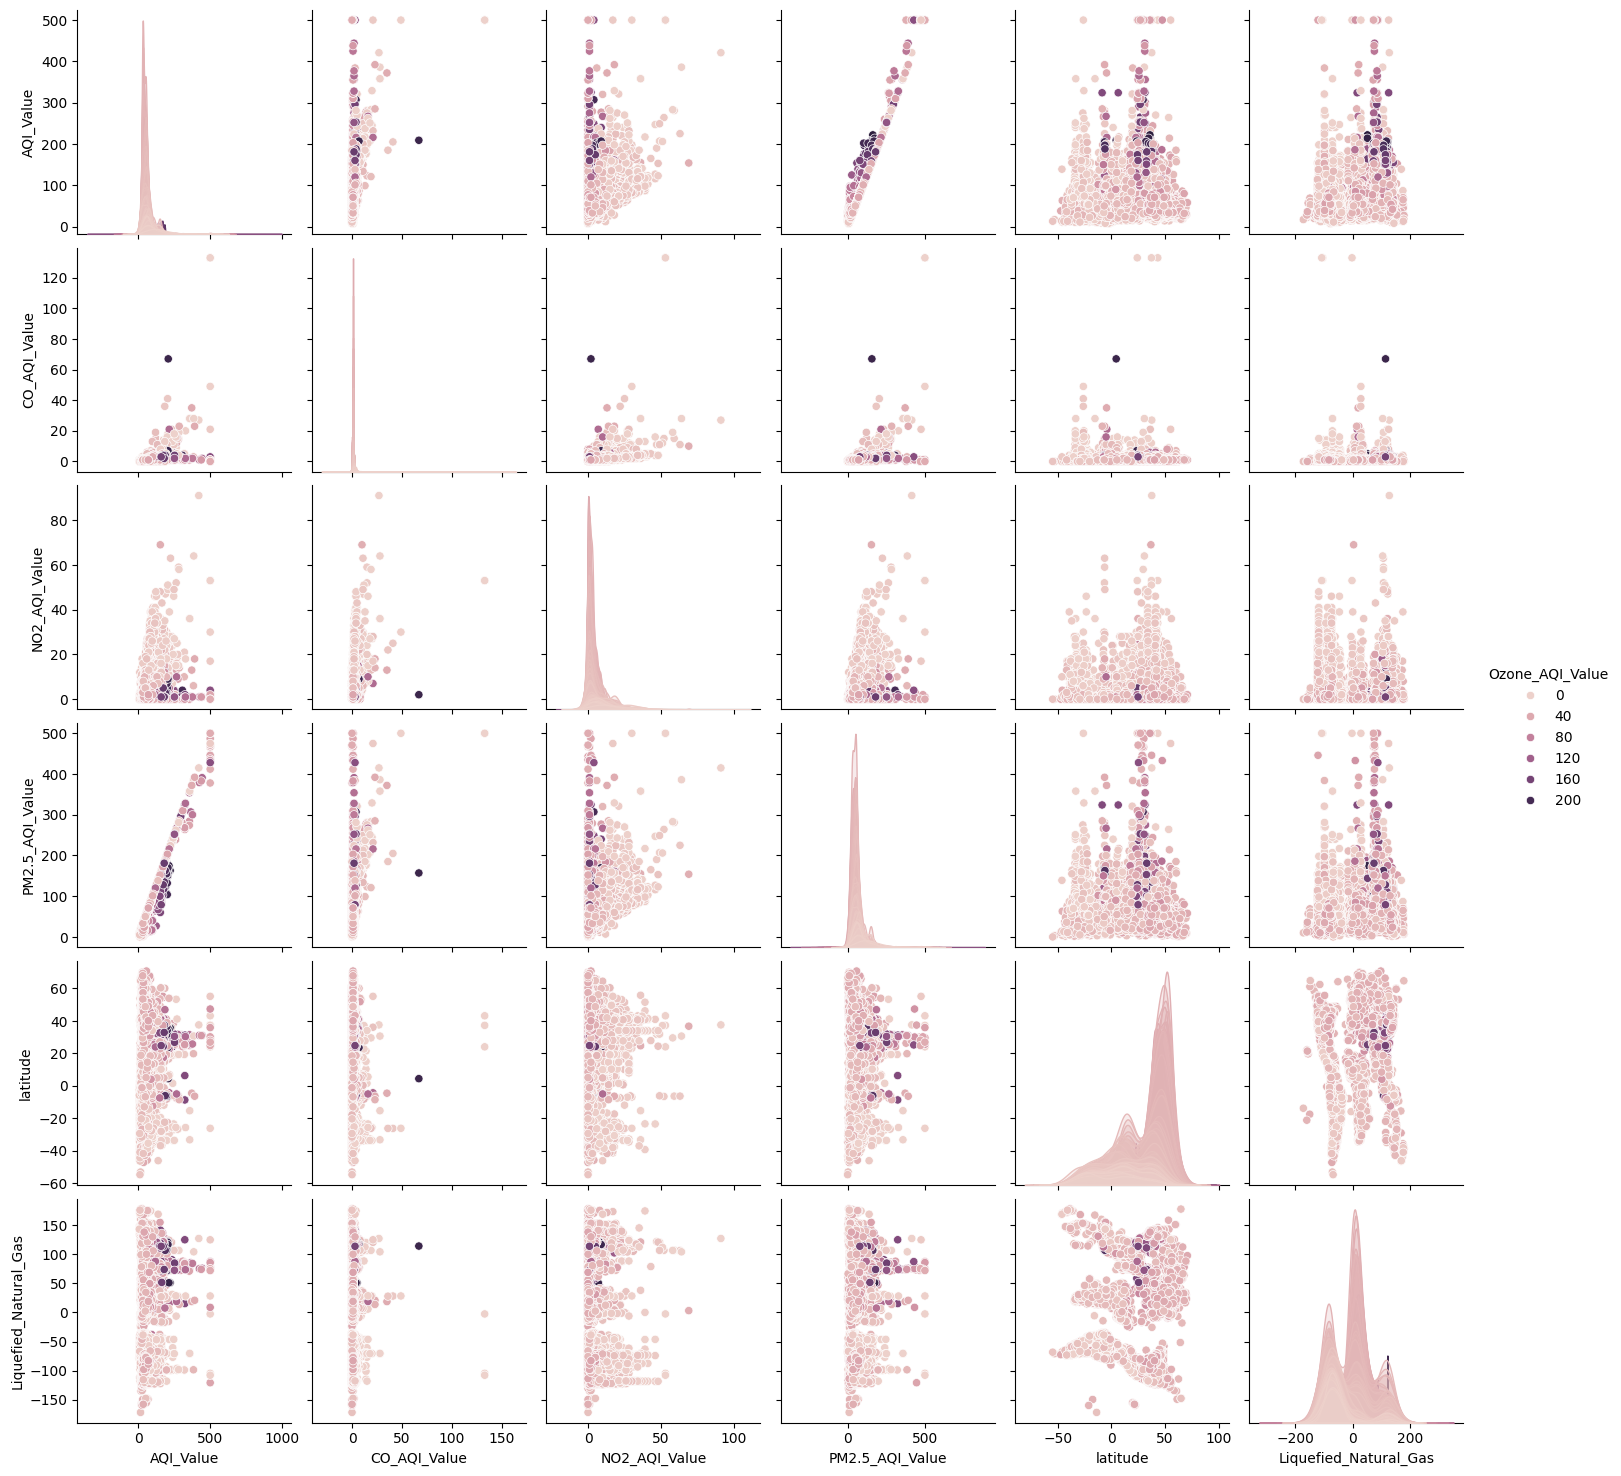

In [28]:
sns.pairplot(df,hue = 'Ozone_AQI_Value')
plt.show()

In [33]:
# import pandas as pd
# from ydata_profiling import ProfileReport

# # Load your dataset (replace 'your_dataset.csv' with your file path)
# df = pd.read_csv("data/AQI.csv")

# # Generate a profiling report
# profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# # Save the report to an HTML file
# profile.to_file("pandas_profiling_report.html")